In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import os
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [3]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#Load dataset, /Users/noelfeisst/Downloads/Recipe_dataset.csv
data_1 = pd.read_csv('~/code/bkpearse/Cooking-Project/raw_data/recipe_dataset.csv')

In [ ]:
data = data_1

In [16]:
data.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [17]:
#rename or should I delete first column
data.rename(columns= {'Unnamed: 0' : 'number'}, inplace=True)

In [18]:
#Check for duplicates
data.duplicated().sum()

0

In [7]:
#check for missing data
data.isnull().sum()

index          0
title          0
ingredients    0
directions     0
link           0
source         0
NER            0
dtype: int64

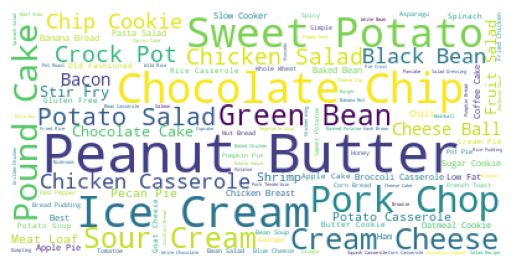

In [7]:
#creating wordcloud for title
text = ' '.join(i for i in data.title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



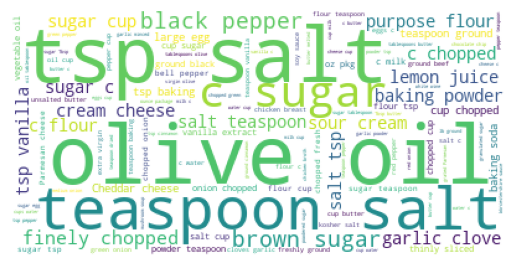

In [8]:
#creating wordcloud for ingredients
text = ' '.join(i for i in data.ingredients)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Notes 
- It seems like the columns that need to be changed are: title, ingredients, and directions
- Should I drop the number and source column?
- Should title be all lower case?
- Change all numbers to words?
- Keep or delete everything in the parenthesis? 

In [27]:
sample

,number,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."
5,5,Cheeseburger Potato Soup,"[""6 baking potatoes"", ""1 lb. of extra lean gro...","[""Wash potatoes; prick several times with a fo...",www.cookbooks.com/Recipe-Details.aspx?id=20115,Gathered,"[""baking potatoes"", ""extra lean ground beef"", ..."
6,6,Rhubarb Coffee Cake,"[""1 1/2 c. sugar"", ""1/2 c. butter"", ""1 egg"", ""...","[""Cream sugar and butter."", ""Add egg and beat ...",www.cookbooks.com/Recipe-Details.aspx?id=210288,Gathered,"[""sugar"", ""butter"", ""egg"", ""buttermilk"", ""flou..."
7,7,Scalloped Corn,"[""1 can cream-style corn"", ""1 can whole kernel...","[""Mix together both cans of corn, crackers, eg...",www.cookbooks.com/Recipe-Details.aspx?id=876969,Gathered,"[""cream-style corn"", ""whole kernel corn"", ""cra..."
8,8,Nolan'S Pepper Steak,"[""1 1/2 lb. round steak (1-inch thick), cut in...","[""Roll steak strips in flour."", ""Brown in skil...",www.cookbooks.com/Recipe-Details.aspx?id=375254,Gathered,"[""tomatoes"", ""water"", ""onions"", ""Worcestershir..."
9,9,Millionaire Pie,"[""1 large container Cool Whip"", ""1 large can c...","[""Empty Cool Whip into a bowl."", ""Drain juice ...",www.cookbooks.com/Recipe-Details.aspx?id=794547,Gathered,"[""pineapple"", ""condensed milk"", ""lemons"", ""pec..."


### Working on title column

In [59]:
#stripping all whitespaces at begining and end of string.
# im going to practice with a smaller sample so it runs faster

sample = data[:10]

sample.loc[:,'title'] = [text.strip() for text in sample.title]



/var/folders/hx/jrk63rxs37jbc80cx6wk57880000gn/T/ipykernel_16259/1636035306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.loc[:,'title'] = [text.strip() for text in sample.title]


In [63]:
# All lowercase?

sample['title'] = sample['title'].str.lower()

/var/folders/hx/jrk63rxs37jbc80cx6wk57880000gn/T/ipykernel_16259/915277196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['title'] = sample['title'].str.lower()


In [68]:
# replace - , ( )
string.punctuation

for text in sample.title:
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    

In [73]:
for punctuation in string.punctuation:
    sample['title'] = sample['title'].replace(punctuation, '')

/var/folders/hx/jrk63rxs37jbc80cx6wk57880000gn/T/ipykernel_16259/324251381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['title'] = sample['title'].replace(punctuation, '')


In [74]:
sample

,number,title,ingredients,directions,link,source,NER
0,0,millionaire pie,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,millionaire pie,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,millionaire pie,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,millionaire pie,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,millionaire pie,"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."
5,5,millionaire pie,"[""6 baking potatoes"", ""1 lb. of extra lean gro...","[""Wash potatoes; prick several times with a fo...",www.cookbooks.com/Recipe-Details.aspx?id=20115,Gathered,"[""baking potatoes"", ""extra lean ground beef"", ..."
6,6,millionaire pie,"[""1 1/2 c. sugar"", ""1/2 c. butter"", ""1 egg"", ""...","[""Cream sugar and butter."", ""Add egg and beat ...",www.cookbooks.com/Recipe-Details.aspx?id=210288,Gathered,"[""sugar"", ""butter"", ""egg"", ""buttermilk"", ""flou..."
7,7,millionaire pie,"[""1 can cream-style corn"", ""1 can whole kernel...","[""Mix together both cans of corn, crackers, eg...",www.cookbooks.com/Recipe-Details.aspx?id=876969,Gathered,"[""cream-style corn"", ""whole kernel corn"", ""cra..."
8,8,millionaire pie,"[""1 1/2 lb. round steak (1-inch thick), cut in...","[""Roll steak strips in flour."", ""Brown in skil...",www.cookbooks.com/Recipe-Details.aspx?id=375254,Gathered,"[""tomatoes"", ""water"", ""onions"", ""Worcestershir..."
9,9,millionaire pie,"[""1 large container Cool Whip"", ""1 large can c...","[""Empty Cool Whip into a bowl."", ""Drain juice ...",www.cookbooks.com/Recipe-Details.aspx?id=794547,Gathered,"[""pineapple"", ""condensed milk"", ""lemons"", ""pec..."
